In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from scipy.special import expit

from tqdm import  tqdm_notebook as tqdm

import scipy.signal as signal

from PIL import ImageFilter
from scipy.ndimage.filters import gaussian_filter

%matplotlib inline  

from skimage import morphology

from skimage import filters

from skimage.feature import corner_peaks
from skimage.feature import corner_shi_tomasi
from skimage.feature import corner_harris

import time

In [9]:
def load_image(filename):
    return Image.open(filename).convert('L').resize([255,255])


In [10]:
img = load_image('Picture/1.tif')

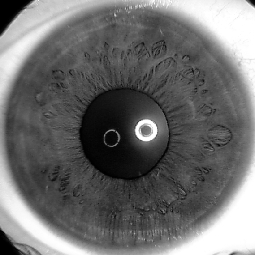

In [11]:
img

In [14]:
arr = (np.array(img)/255).astype(np.float64)
arr = (filters.gaussian(arr/255.0, sigma=0.5)*255).astype(np.float64)
new_arr = 255*(arr>0.12)


new_arr = morphology.erosion(new_arr/255.0, selem = morphology.disk(1))*255.0
new_arr = (filters.sobel(new_arr/255.0)*255).astype(np.float64)

new_arr = 255*(arr>0.5)

new = Image.fromarray((new_arr).astype(np.uint8))

In [15]:
arr = (np.array(img)).astype(np.float64)

arr1 = (filters.gaussian(arr/255.0, sigma=2)*255).astype(np.float64)

arr2 = (filters.sobel(arr1/255.0)*255).astype(np.float64)

tr = filters.threshold_mean(arr2)
new_arr = 255*(arr2>tr)

new_arr = morphology.erosion(new_arr/255.0, selem = morphology.disk(4))*255.0

new = Image.fromarray((new_arr).astype(np.uint8))

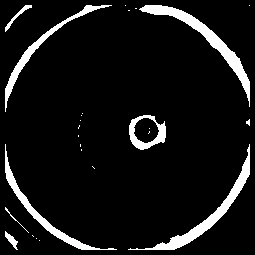

In [16]:
new

In [17]:
# new.save('Picture/2_mask.jpg')

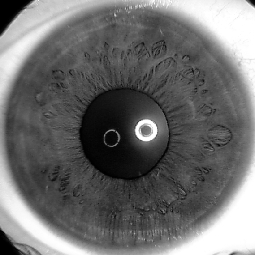

In [28]:
img

# Correct preprop

In [83]:
arr = (np.array(img)).astype(np.float64)

arr1 = (filters.gaussian(arr/255.0, sigma=2)*255).astype(np.float64)

arr2 = (filters.sobel(arr1/255.0)*255).astype(np.float64)

tr = filters.threshold_mean(arr2)
new_arr = 255*(arr2>tr)

new_arr = morphology.erosion(new_arr/255.0, selem = morphology.disk(5))*255.0

big_arr = new_arr

new = Image.fromarray((new_arr).astype(np.uint8))

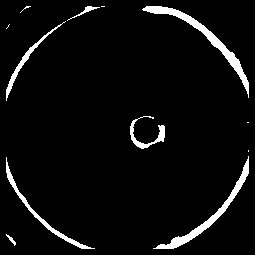

In [84]:
new

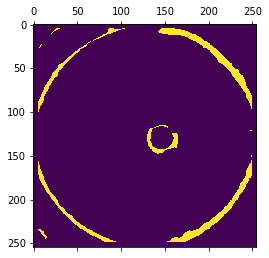

In [85]:
plt.matshow(new_arr)

In [86]:
for i in range(big_arr.shape[0]):
    for j in range(big_arr.shape[1]):
        if i > 100 and i < 200:
            if j > 100 and j < 200:
                big_arr[i,j] = 0

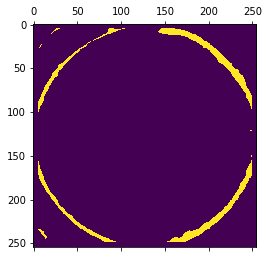

In [87]:
plt.matshow(big_arr)

In [256]:
arr = (np.array(img)).astype(np.float64)

new_arr = 255*(arr>40)

for i in range(new_arr.shape[0]):
    for j in range(new_arr.shape[1]):
        if (i-0.5*new_arr.shape[0])**2 + (j-0.5*new_arr.shape[1])**2 - 90**2 > 0:
                new_arr[i,j] = 255
                
new_arr = (filters.gaussian(new_arr/255.0, sigma=2)*255).astype(np.float64)

# new_arr = 10*(filters.sobel(new_arr/255.0)*255).astype(np.float64)

# tr = filters.threshold_mean(new_arr)
# new_arr = 255*(new_arr>tr)

new_arr = 255*(new_arr<230)

# new_arr = morphology.closing(new_arr/255.0, selem = morphology.disk(20))*255.0

new_arr = 10*(filters.sobel(new_arr/255.0)*255).astype(np.float64)

# new_arr = (filters.gaussian(new_arr/255.0, sigma=1)*255).astype(np.float64)

new_arr = 255*(new_arr>50)

low_arr = new_arr

new = Image.fromarray((new_arr).astype(np.uint8))

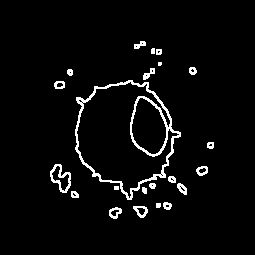

In [257]:
new

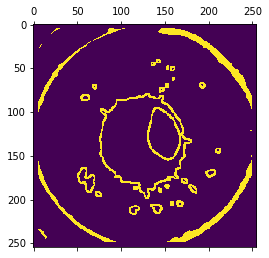

In [258]:
plt.matshow(low_arr + big_arr)

In [259]:
new = Image.fromarray((low_arr + big_arr).astype(np.uint8))

In [260]:
new.save('Picture/1_mask_3.jpg')